In [1]:
from astropy import units as u
import numpy as np   
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def diffusion(E,D0,gamma):
    return D0*E**gamma

In [3]:
def diff_distance(E,DE,t,gamma,Emax):
    return 2*np.sqrt( DE*t * (1-(1-E/Emax)**(1-gamma)) / ((1-gamma)*E/Emax) )

In [4]:
def integrando(E,alpha,Ecut):
    return E**(1-alpha)*np.exp(-E/Ecut)

def integral(E,Emax,alpha,Ecut):
    return integrate.quad(lambda E: integrando(E,alpha,Ecut),1,Emax)

In [5]:
def Q0(E, Emax, alpha, Ec, Eout, fe, SpinDown, t, tau):
    return fe* SpinDown* t**2/tau /(integral(E, Emax, alpha, Ec)[0])

In [6]:
def flujo_pulsar(E,r,rdiff,t,Q0,a,alpha,Ec,gamma,Emax):
    c = 3*10**8* u.m/u.s
    cterm = c/(4*np.pi)
    qterm = Q0/(np.pi**(3/2)*r**3)
    rterm = (r/rdiff)**3 * np.exp(-(r/rdiff)**2)
    lossterm = (1-a*t*E)**(alpha-2) * np.exp(-E/((1-a*t*E)*Ec))
    alfaterm = E**(-alpha)
    
    phi = cterm * qterm * rterm * lossterm * alfaterm
    return phi

CONSTANTES

In [7]:
fact_conversion = {'years_s': 3.15576e7 * u.s/u.year, 
                   'kpc_m': 1/(3.2408e-20 * u.kpc/u.m), 
                   'cm2_m2': 1e-4*u.m**2/u.cm**2, 
                   'erg_GeV': 6.242e2/u.erg, 
                   'J_GeV': 6.242e9/u.J 
                  }

In [8]:
constantes = {'a': 1.4e-16* u.s**-1 , 
              'tau': 1e4 * u.year * fact_conversion['years_s'], 
              'D0': 6.2e27 * u.cm**2 / u.s * fact_conversion['cm2_m2']
             }

GEMINGA

In [9]:
geminga = {'r': 0.25 * u.kpc * fact_conversion['kpc_m'], 
           't': 3.42e5 * u.year * fact_conversion['years_s'], 
           'alpha': 1.98, 
           'Ec': 1000, 
           'gamma': 0.46, 
           'fe': 0.1,
           'Eout': 14.2*1e48 * u.erg * fact_conversion['erg_GeV'],
           'SpinDown': 3.2e34 *u.erg/u.s * fact_conversion['erg_GeV']
          }

geminga.setdefault('Emax',1/(constantes['a']*geminga['t']))
geminga.update(constantes)

In [10]:
#Energía total del pulsar    


#### OJO ####
# Emax es un valor que está incluido en el intervalo, sin embargo, las energías no pueden ser superiores a Emax.
# Hay que amputar

Eraw = np.logspace(0,5,1000) # rango de energías
i = 0
Eg = np.array([])
while Eraw[i] < geminga['Emax']:
    Eg = np.append(Eg,Eraw[i])
    i += 1



In [11]:
geminga.setdefault('Q0', Q0(Eg, geminga['Emax'], geminga['alpha'], geminga['Ec'], geminga['Eout'], geminga['fe'], geminga['SpinDown'], geminga['t'], geminga['tau']))
geminga.setdefault('D(E)', diffusion(Eg, geminga['D0'], geminga['gamma']))
geminga.setdefault('rdiff',diff_distance(Eg, geminga['D(E)'], geminga['t'], geminga['gamma'], geminga['Emax']))
geminga.keys()

dict_keys(['r', 't', 'alpha', 'Ec', 'gamma', 'fe', 'Eout', 'SpinDown', 'Emax', 'a', 'tau', 'D0', 'Q0', 'D(E)', 'rdiff'])

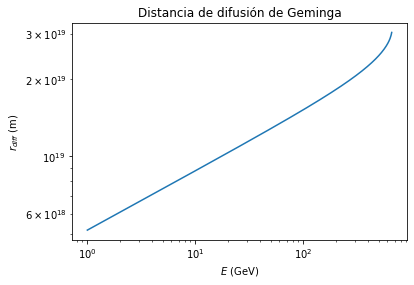

In [12]:
plt.plot(Eg,geminga['rdiff'])
plt.title('Distancia de difusión de Geminga')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$E$ (GeV)')
plt.ylabel('$r_{diff}$ (m)')
plt.show()

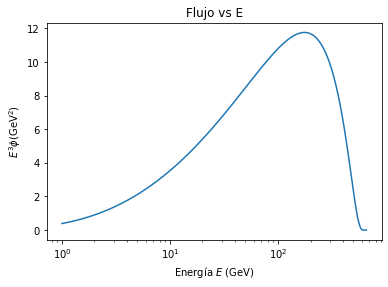

In [13]:
phi_geminga = flujo_pulsar(Eg, geminga['r'], geminga['rdiff'], geminga['t'], geminga['Q0'], geminga['a'], 
                           geminga['alpha'], geminga['Ec'], geminga['gamma'], geminga['Emax'])

plt.plot(Eg,Eg**3*phi_geminga)
plt.title('Flujo vs E')
plt.xscale('log')
plt.xlabel('Energía $E$ (GeV)')
plt.ylabel('$E^3 \phi ($GeV$^2 )$')
plt.show()

MONOGEM

In [14]:
monogem = {'r':0.28 * u.kpc * fact_conversion['kpc_m'], 
           't': 1.1e5 * u.year * fact_conversion['years_s'], 
           'alpha': 2.04, 
           'Ec': 1000, 
           'gamma': 0.46, 
           'fe': 0.18,
           'Eout': 3.3* 1e48* u.erg *  fact_conversion['erg_GeV'],
           'SpinDown': 3.8e34 *u.erg/u.s * fact_conversion['erg_GeV'],
          }
monogem.setdefault('Emax',1/(constantes['a']*monogem['t']))
monogem.update(constantes)

In [15]:
Ei = np.logspace(0,5,1000) # rango de energías
i = 0
Em = np.array([])
while Ei[i] < monogem['Emax']:
    Em = np.append(Em,Ei[i])
    i += 1

In [16]:
monogem.setdefault('Q0', Q0(Em, monogem['Emax'], monogem['alpha'], monogem['Ec'], monogem['Eout'], monogem['fe'], monogem['SpinDown'], monogem['t'], monogem['tau']))
monogem.setdefault('D(E)', diffusion(Em, monogem['D0'], monogem['gamma']))
monogem.setdefault('rdiff',diff_distance(Em, monogem['D(E)'], monogem['t'], monogem['gamma'], monogem['Emax']))
monogem['Q0']

<Quantity 2.94562485e+49>

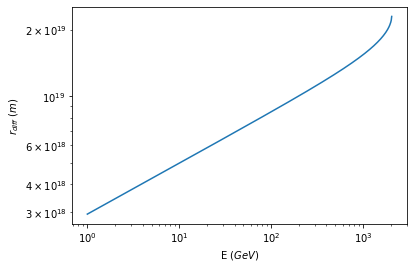

In [17]:
plt.plot(Em,monogem['rdiff'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E ($GeV$)')
plt.ylabel('$r_{diff}$ ($m$)')
plt.show()

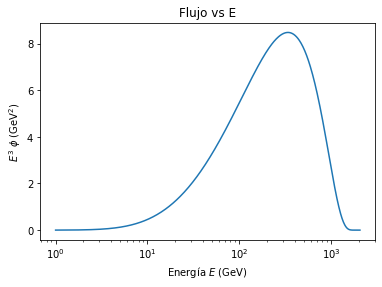

In [18]:
phi_monogem = flujo_pulsar(Em, monogem['r'], monogem['rdiff'], monogem['t'], monogem['Q0'], monogem['a'], 
                           monogem['alpha'], monogem['Ec'], monogem['gamma'], monogem['Emax'])

plt.plot(Em,Em**3*phi_monogem)
plt.title('Flujo vs E')
plt.xscale('log')
plt.xlabel('Energía $E$ (GeV)')
plt.ylabel('$E^3$ $\phi$ (GeV$^2$)')
plt.show()

In [19]:
phi_geminga2 = np.append(np.array(phi_geminga),np.array(np.zeros(len(phi_monogem)-len(phi_geminga))))
phi_monogem = np.array(phi_monogem)
pulsars = phi_geminga2 + phi_monogem

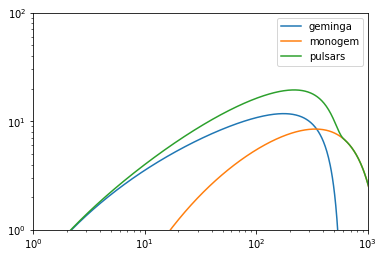

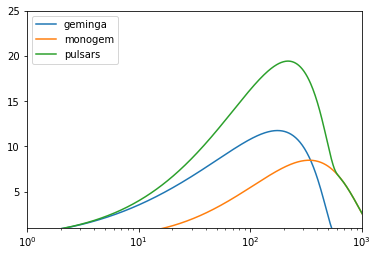

In [20]:
plt.plot(Eg,Eg**3*phi_geminga,label='geminga')
plt.plot(Em,Em**3*phi_monogem,label='monogem')
plt.plot(Em,Em**3*pulsars,label='pulsars')
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1,100)
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(Eg,Eg**3*phi_geminga,label='geminga')
plt.plot(Em,Em**3*phi_monogem,label='monogem')
plt.plot(Em,Em**3*pulsars,label='pulsars')
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1,25)
plt.legend()
plt.show()


Cambiamos las constantes

In [21]:
geminga.keys()

dict_keys(['r', 't', 'alpha', 'Ec', 'gamma', 'fe', 'Eout', 'SpinDown', 'Emax', 'a', 'tau', 'D0', 'Q0', 'D(E)', 'rdiff'])

Variables fijas: Distancia (r), Edad (t), Ritmo de pérdida de energía por inverse Compton (a), Energía máxima (Emax), tiempo característico (tau), Spin Down (SpinDown). 

Con el resto de las variables puedo jugar, son valores muchos de ellos extraídos de análisis de otros datos o hallados teóricamente. 

Voy a variar drásticamente los valores de gamma y D0 para conocer cómo cambia la curva con cada variación.

Aumentamos D0

In [22]:
geminga['D0'], geminga['gamma'] = 3.4e27 * u.cm**2 / u.s * fact_conversion['cm2_m2'], 0.70
monogem['D0'], monogem['gamma'] = 3.4e27 * u.cm**2 / u.s * fact_conversion['cm2_m2'], 0.70

In [23]:
geminga['D(E)'] = diffusion(Eg, geminga['D0'], geminga['gamma'])
geminga['rdiff'] = diff_distance(Eg, geminga['D(E)'], geminga['t'], geminga['gamma'], geminga['Emax'])

In [24]:
monogem['D(E)'] = diffusion(Em, monogem['D0'], monogem['gamma'])
monogem['rdiff'] = diff_distance(Em, monogem['D(E)'], monogem['t'], monogem['gamma'], monogem['Emax'])

In [25]:
phi_geminga = flujo_pulsar(Eg, geminga['r'], geminga['rdiff'], geminga['t'], geminga['Q0'], geminga['a'], 
                           geminga['alpha'], geminga['Ec'], geminga['gamma'], geminga['Emax'])

In [26]:
phi_monogem = flujo_pulsar(Em, monogem['r'], monogem['rdiff'], monogem['t'], monogem['Q0'], monogem['a'], 
                           monogem['alpha'], monogem['Ec'], monogem['gamma'], monogem['Emax'])

In [27]:
phi_geminga2 = np.append(np.array(phi_geminga),np.array(np.zeros(len(phi_monogem)-len(phi_geminga))))
phi_monogem = np.array(phi_monogem)
pulsars = phi_geminga2 + 4*phi_monogem

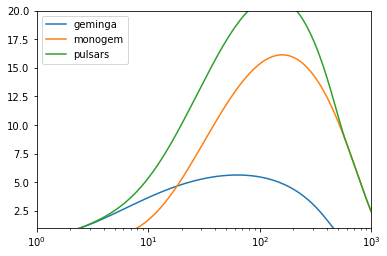

In [28]:
plt.plot(Eg,Eg**3*phi_geminga,label='geminga')
plt.plot(Em,Em**3*4*phi_monogem,label='monogem')
plt.plot(Em,Em**3*pulsars,label='pulsars')
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1,20)
plt.legend()
plt.show()

Aumentamos aun más D0

In [29]:
geminga['D0'], geminga['gamma'] = 1.2e27 * u.cm**2 / u.s * fact_conversion['cm2_m2'], 0.4
monogem['D0'], monogem['gamma'] = 1.2e27 * u.cm**2 / u.s * fact_conversion['cm2_m2'], 0.4

In [30]:
geminga['D(E)'] = diffusion(Eg, geminga['D0'], geminga['gamma'])
geminga['rdiff'] = diff_distance(Eg, geminga['D(E)'], geminga['t'], geminga['gamma'], geminga['Emax'])

In [31]:
monogem['D(E)'] = diffusion(Em, monogem['D0'], monogem['gamma'])
monogem['rdiff'] = diff_distance(Em, monogem['D(E)'], monogem['t'], monogem['gamma'], monogem['Emax'])

In [32]:
phi_geminga = flujo_pulsar(Eg, geminga['r'], geminga['rdiff'], geminga['t'], geminga['Q0'], geminga['a'], 
                           geminga['alpha'], geminga['Ec'], geminga['gamma'], geminga['Emax'])

In [33]:
phi_monogem = 2*flujo_pulsar(Em, monogem['r'], monogem['rdiff'], monogem['t'], monogem['Q0'], monogem['a'], 
                           monogem['alpha'], monogem['Ec'], monogem['gamma'], monogem['Emax'])

In [34]:
phi_geminga2 = np.append(np.array(phi_geminga),np.array(np.zeros(len(phi_monogem)-len(phi_geminga))))
phi_monogem = np.array(phi_monogem)
pulsars = phi_geminga2 + phi_monogem

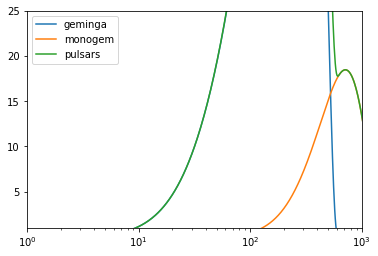

In [35]:
plt.plot(Eg,Eg**3*phi_geminga,label='geminga')
plt.plot(Em,Em**3*phi_monogem,label='monogem')
plt.plot(Em,Em**3*pulsars,label='pulsars')
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1,25)
plt.legend()
plt.show()

Aumentamos todavía más aun D0

In [36]:
geminga['D0'], geminga['gamma'] = 6.2e28 * u.cm**2 / u.s * fact_conversion['cm2_m2'], 0.31
monogem['D0'], monogem['gamma'] = 6.2e28 * u.cm**2 / u.s * fact_conversion['cm2_m2'], 0.31

In [37]:
geminga['D(E)'] = diffusion(Eg, geminga['D0'], geminga['gamma'])
geminga['rdiff'] = diff_distance(Eg, geminga['D(E)'], geminga['t'], geminga['gamma'], geminga['Emax'])

In [38]:
monogem['D(E)'] = diffusion(Em, monogem['D0'], monogem['gamma'])
monogem['rdiff'] = diff_distance(Em, monogem['D(E)'], monogem['t'], monogem['gamma'], monogem['Emax'])

In [39]:
phi_geminga = 4*flujo_pulsar(Eg, geminga['r'], geminga['rdiff'], geminga['t'], geminga['Q0'], geminga['a'], 
                           geminga['alpha'], geminga['Ec'], geminga['gamma'], geminga['Emax'])

In [40]:
phi_monogem = 10*flujo_pulsar(Em, monogem['r'], monogem['rdiff'], monogem['t'], monogem['Q0'], monogem['a'], 
                           monogem['alpha'], monogem['Ec'], monogem['gamma'], monogem['Emax'])

In [41]:
phi_geminga2 = np.append(np.array(phi_geminga),np.array(np.zeros(len(phi_monogem)-len(phi_geminga))))
phi_monogem = np.array(phi_monogem)
pulsars = phi_geminga2 + phi_monogem

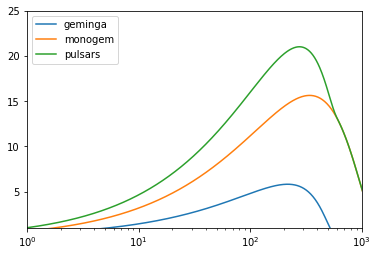

In [42]:
plt.plot(Eg,Eg**3*phi_geminga,label='geminga')
plt.plot(Em,Em**3*phi_monogem,label='monogem')
plt.plot(Em,Em**3*pulsars,label='pulsars')
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1,25)
plt.legend()
plt.show()